# Rabi Oscillations

Below, we reproduce some of the results described in the paper [Revising quantum optical phenomena in adatoms coupled to graphene nanoantennas](https://www.degruyter.com/document/doi/10.1515/nanoph-2022-0154/html).

NOTE: It is a good idea to get familiar with orbital lists by consulting the tutorial first.

## Building a two-level system

We set up an isolated adatom.

In [1]:
from granad import Orbital, OrbitalList

lower_level = Orbital()
upper_level = Orbital()
adatom  = OrbitalList( [lower_level, upper_level] )
adatom.set_hamiltonian_element(lower_level, lower_level, -0.5)
adatom.set_hamiltonian_element(upper_level, upper_level, 0.5)
adatom.set_dipole_element( lower_level, upper_level, [0, 7.5/2, 0] ) 
adatom.set_electrons( 1 )

We study undamped time evolution under harmonic illumination. Here, we use the rotating wave approximation (RWA) in the field -- two-level-system coupling:

RHS compiled
RHS compiled


100.0 %


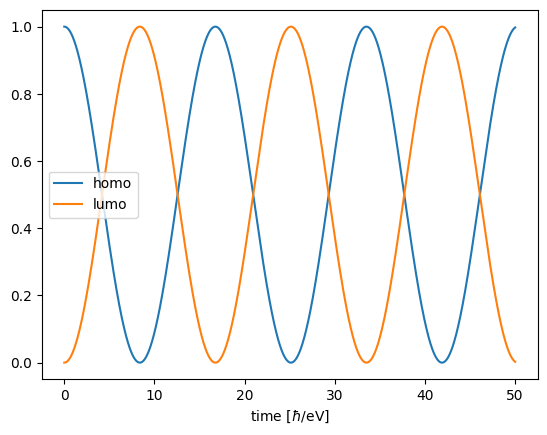

In [2]:
from granad import Wave
wave = Wave(amplitudes=[0, 0.05, 0], frequency=1)
result = adatom.master_equation(
    end_time=50,
    grid = 10,
    illumination=wave,
    use_rwa=True,
    coulomb_strength = 0.0,
    density_matrix = ["occ_e"],
)
adatom.show_res(result, plot_only = [adatom.homo, adatom.homo+1], plot_labels = ["homo", "lumo"], show_illumination = False)

## Coupling to a Flake

We combine the TLS with a graphene flake in the top position above a selected carbon atom.

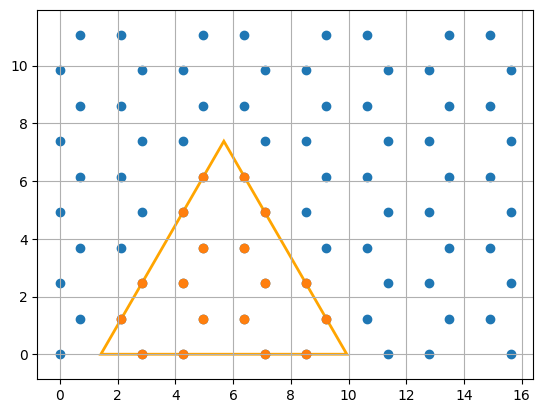

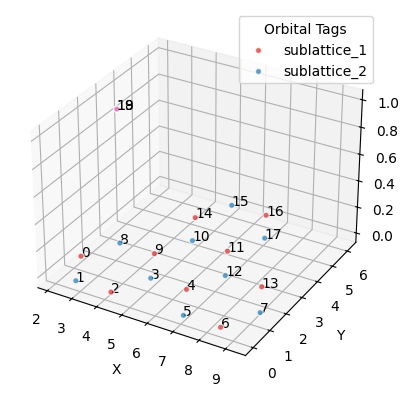

In [3]:
import jax.numpy as jnp
from granad import MaterialCatalog, Triangle
graphene = MaterialCatalog.get("graphene")
flake = graphene.cut_flake(Triangle(10, armchair = True), plot=True)
flake_with_adatom = flake + adatom
pz_orbital = flake_with_adatom[8]
top = pz_orbital.position + jnp.array([0, 0, 1])
flake_with_adatom.set_position(top, adatom)
flake_with_adatom.show_3d(show_index=True)

We set the couplings and inspect the resulting energy levels

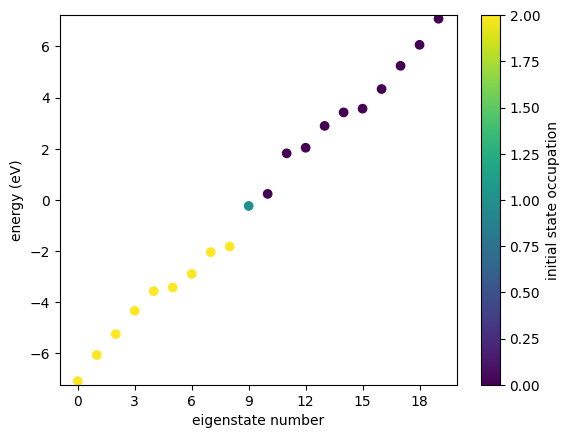

In [4]:
flake_with_adatom.set_hamiltonian_element(pz_orbital, adatom, 3.5)
flake_with_adatom.show_energies()

Identify the energy gap

In [5]:
homo = flake_with_adatom.homo
delta_e = flake_with_adatom.energies[homo + 1] - flake_with_adatom.energies[homo]

The time evolution of the composite system is obtained as follows

RHS compiled
RHS compiled


100.0 %


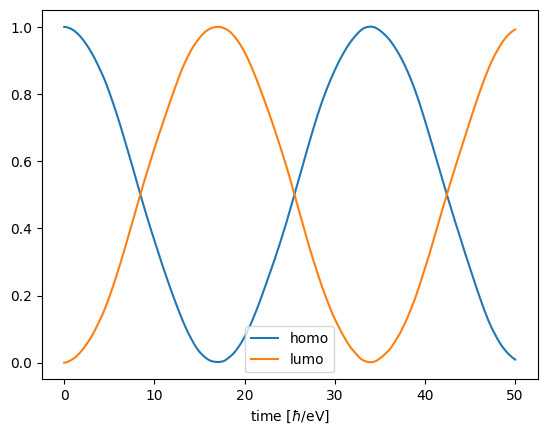

In [6]:
wave = Wave(amplitudes=[0, 0.05, 0], frequency=delta_e)
result = flake_with_adatom.master_equation(
    grid = 10,
    end_time=50,
    illumination=wave,
    use_rwa=True,
    coulomb_strength = 0.0,
    density_matrix = ["occ_e"],
)
flake_with_adatom.show_res( result, plot_only = [homo,homo+1], plot_labels = ["homo", "lumo"], show_illumination = False )